In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
sns.set()

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
train["title"] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test["title"] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [5]:
train.Age.fillna(train.Age.median(), inplace=True)
train.Embarked.fillna('S', inplace=True)
del train['Cabin']
train.Sex.mask(train.Sex == 'male', 0, inplace=True)
train.Sex.mask(train.Sex == 'female', 1, inplace=True)
train.Embarked.mask(train.Embarked == 'S', 0, inplace=True)
train.Embarked.mask(train.Embarked == 'C', 1, inplace=True)
train.Embarked.mask(train.Embarked == 'Q', 2, inplace=True)

In [6]:
test.Age.fillna(train.Age.median(), inplace=True)
test.Embarked.fillna('S', inplace=True)
del test['Cabin']
test.Sex.mask(test.Sex == 'male', 0, inplace=True)
test.Sex.mask(test.Sex == 'female', 1, inplace=True)
test.Embarked.mask(test.Embarked == 'S', 0, inplace=True)
test.Embarked.mask(test.Embarked == 'C', 1, inplace=True)
test.Embarked.mask(test.Embarked == 'Q', 2, inplace=True)

In [7]:
x_train = pd.DataFrame([train.Sex, train.Embarked, train.Age, train.Pclass, train.Parch, train.SibSp]).T

In [8]:
x_test = pd.DataFrame([test.Sex, test.Embarked, test.Age, test.Pclass, test.Parch, test.SibSp]).T

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, train.Survived)

DecisionTreeClassifier()

In [11]:
test['Survived'] = clf.predict(x_test)

In [83]:
from sklearn import tree
import matplotlib.pyplot as plt

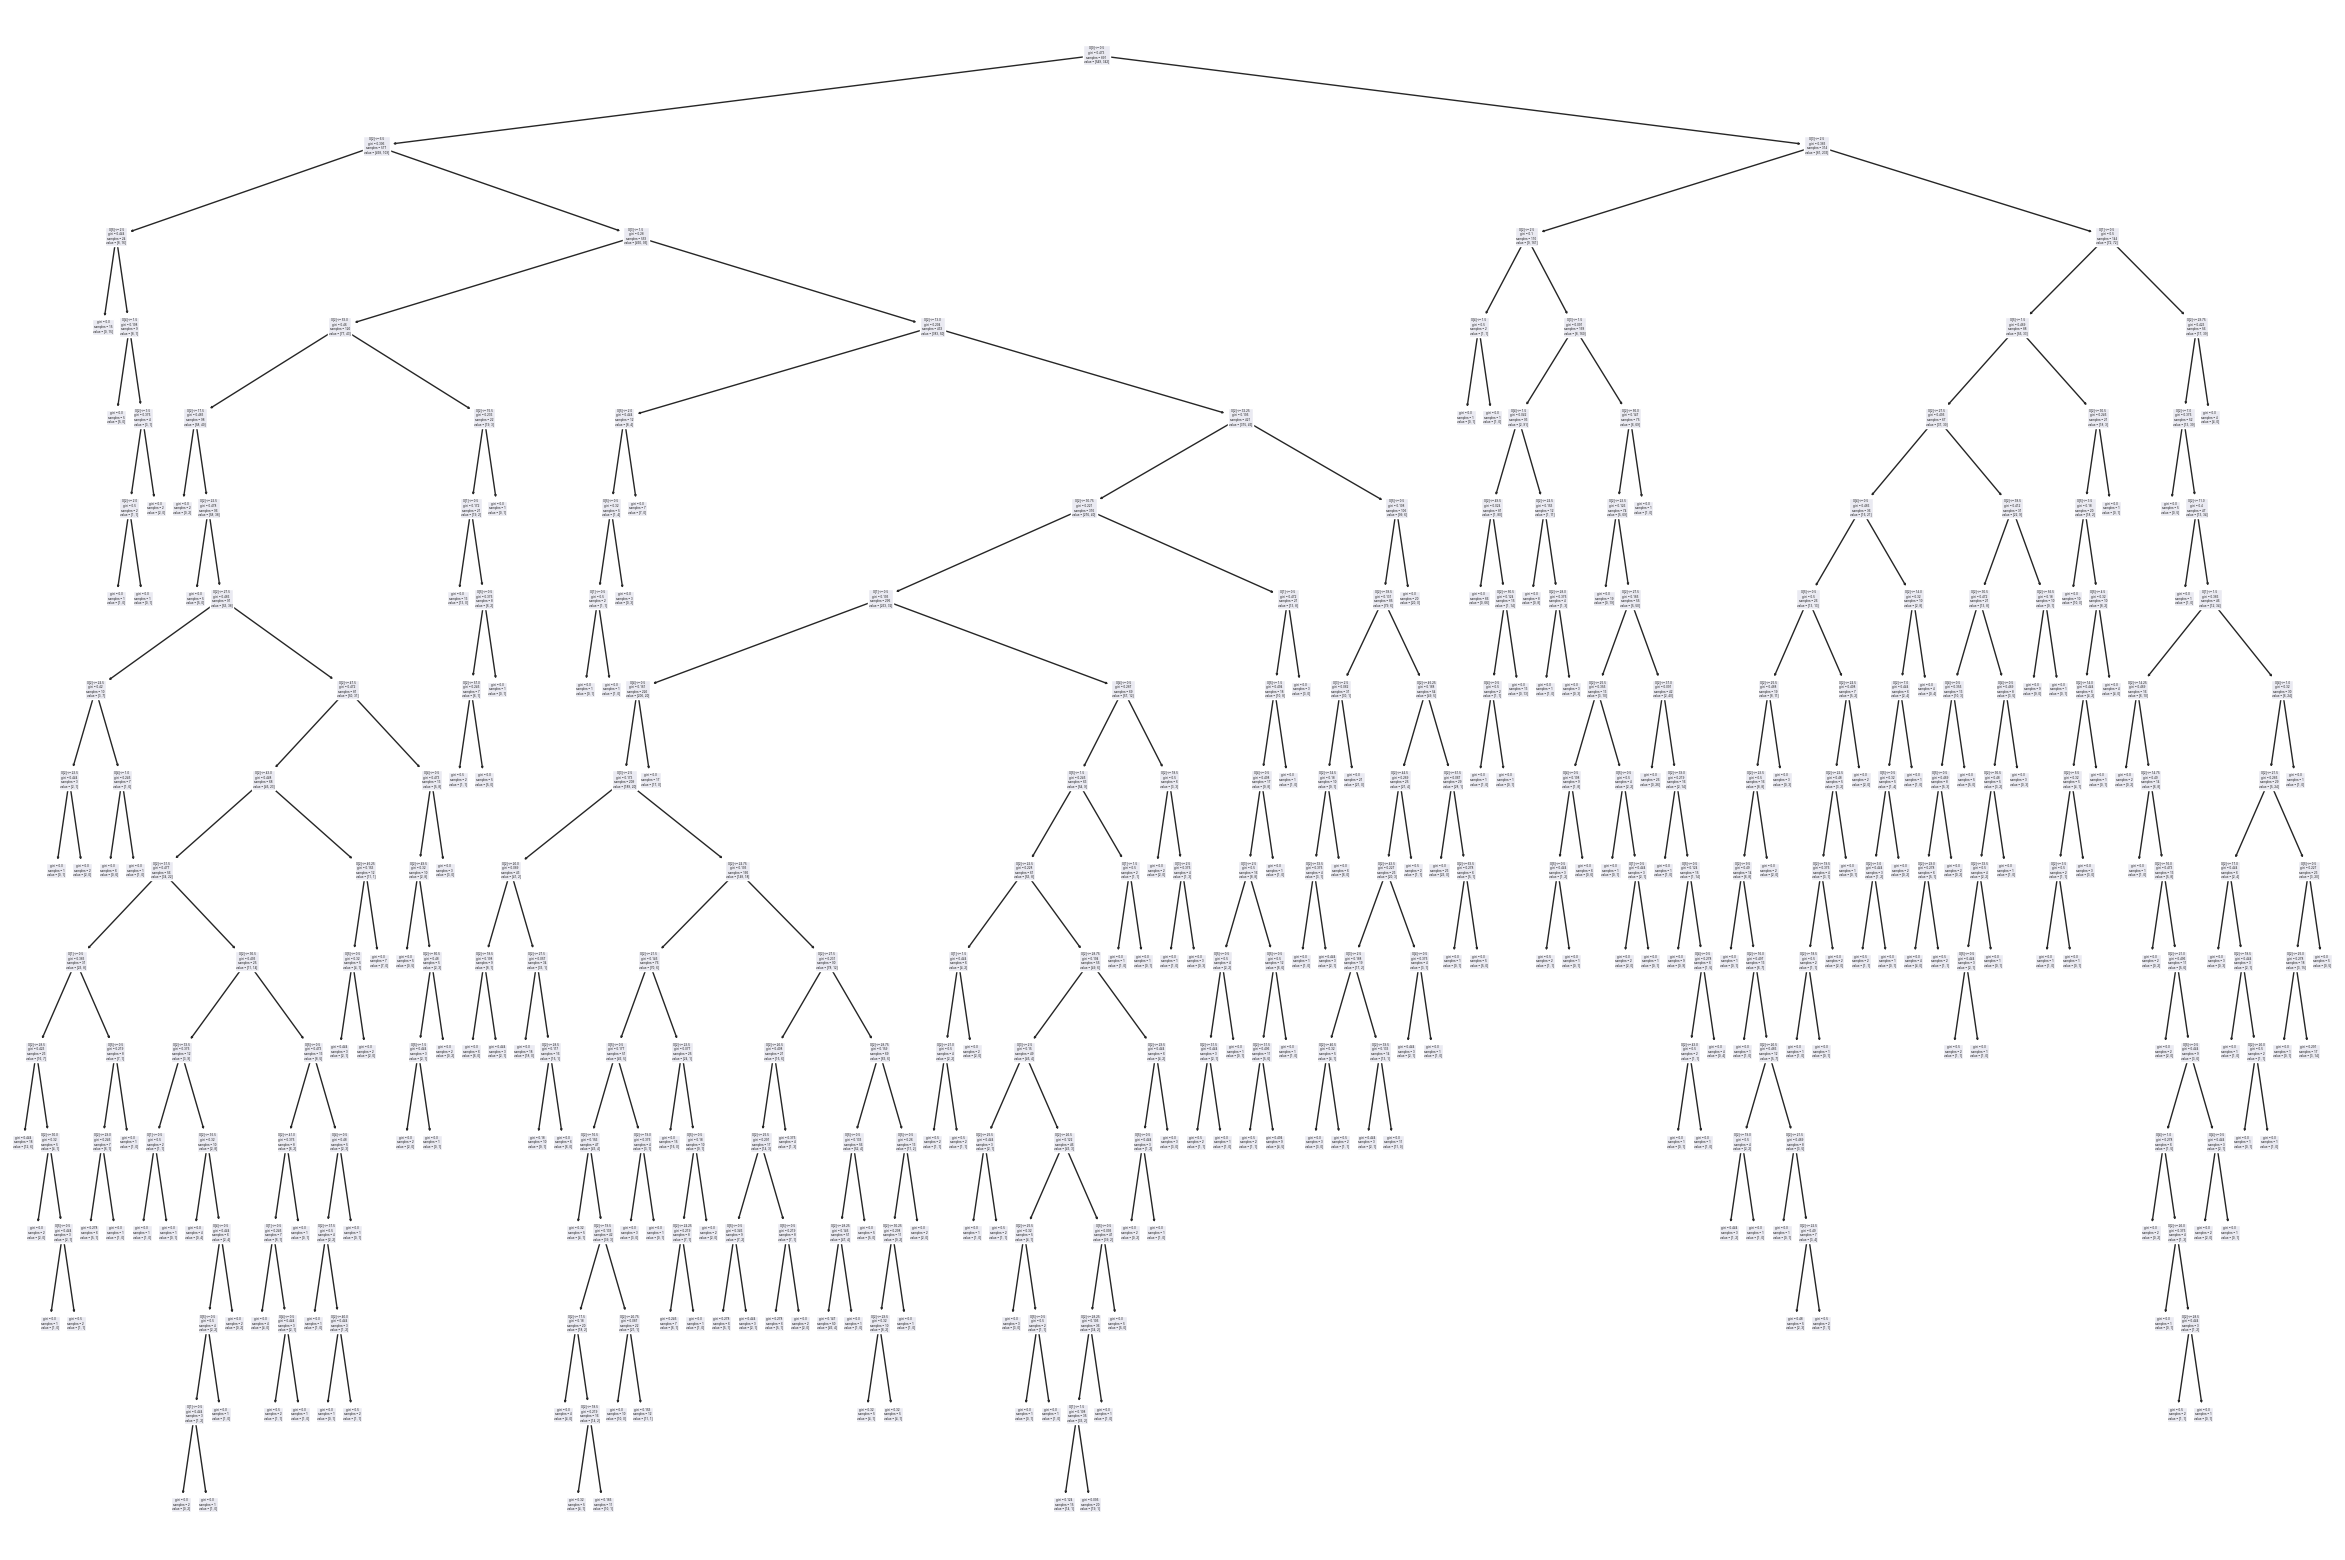

In [144]:
plt.figure(figsize=(30,20))
tree.plot_tree(clf)
plt.show()


In [14]:
submission = test[['PassengerId', 'Survived']]

In [25]:
submission.to_csv('submission.csv', index=False, sep=',')

<AxesSubplot: >

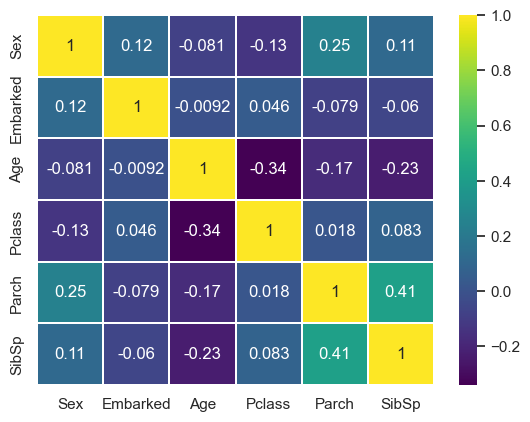

In [132]:
sns.heatmap(x_train.corr(),
            linewidths=0.1,
            vmax=1.0, 
            cmap=plt.cm.viridis,
            linecolor='white',
            annot=True)

In [155]:
train.groupby(['Survived','Sex'])['Survived'].agg(['mean','count','median'])

mean  count  median
Survived Sex                     
0        0     0.0    468     0.0
         1     0.0     81     0.0
1        0     1.0    109     1.0
         1     1.0    233     1.0